In [1]:
DEBUG = False #Change this to "True" to see the output at every stage

In [2]:
import myCNN.layer as CNN
from myMLP import models, layers
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import os

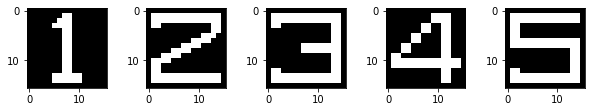

In [3]:
training_dir = 'training_images'
images_list = os.listdir(training_dir)
training_data_dir = [os.path.join(training_dir, image_dir) for image_dir in images_list]
num_images = len(images_list)
size_max_dimension_size = 16
training_data = np.zeros(num_images*size_max_dimension_size*size_max_dimension_size).reshape(num_images, size_max_dimension_size, size_max_dimension_size)

for i in range(num_images):
    training_data[i] = np.array(Image.open(training_data_dir[i]))
    
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.5)
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(training_data[i], cmap='gray', vmin=0, vmax=255)

In [4]:
# Filters and their general Parameters
zero_padding_size = 1 #zero-padding size, putting zero means no padding is being done
pooling_size = 2 #max pooling is defined here
num_filters = 6 #number of filters that are used

filterk = np.zeros((num_filters,3,3))
filterk[0] = np.array([[
    [-1, 2, -1],   
    [-1, 2, -1],   
    [-1, 2, -1]
]])  
filterk[1] = np.array([[
    [-1, -1, -1],   
    [ 2,  2,  2],   
    [-1, -1, -1]
]])
filterk[2] = np.array([[
    [ 2, -1, -1],   
    [-1,  2, -1],   
    [-1, -1,  2]
]])
filterk[3] = np.array([[
    [-1, -1,  2],   
    [-1,  2, -1],   
    [ 2, -1, -1]
]])
filterk[4] = np.array([[
    [-1,  2, -1],   
    [ 2,  2,  2],   
    [-1,  2, -1]
]])
filterk[5] = np.array([[
    [-1, -1,  2],   
    [ 2,  2,  2],   
    [-1, -1,  2]
]])

In [5]:
convolution_object = transforms.Compose([CNN.Normalize(),
                                         CNN.Padding(size = 1),
                                         CNN.ConvLayer(kernels = filterk),
                                         CNN.Relu(),
                                         CNN.MaxPool(pool_size = 2)])

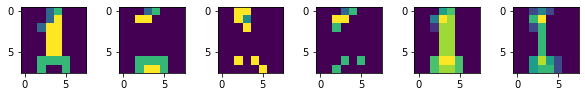

In [6]:
CNN_out = np.zeros(num_images*num_filters*64).reshape(num_images, num_filters, 8, 8)
for i in range(num_images):
    CNN_out[i] = convolution_object(training_data[i])
    
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.5)
for i in range(CNN_out[0].shape[0]):
    plt.subplot(1, CNN_out[0].shape[0], i+1)
    plt.imshow(CNN_out[0][i])

In [7]:
model = models.Sequential(models.Linear(5), models.Sigmoid(), models.MSE())

In [21]:
m = models.Sequential(models.Linear(1), models.Sigmoid(), models.MSE())
a= np.array([[1, 3, 5],
            [2, 4, 6]])
b = np.array([[1],
             [2]])
m.fit(a,b)
m.predict(a[0])

array([1.23628047])

In [8]:
Y = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1]
])

In [9]:
X = np.zeros(num_images*num_filters*64).reshape(num_images, num_filters*8* 8)
for i in range(num_images):
    
    X[i] = CNN_out[i].flatten()/4

In [14]:
for i in range(10):
    print(i)
    model.fit(X, Y)

0
1
2
3
4
5
6
7
8
9


In [16]:
model.predict(X)

ValueError: operands could not be broadcast together with shapes (5,5) (5,384) 

In [11]:
print(out_image[0].reshape(1, -1))
x = np.zeros((6, 64))
for i in range(out_image.shape[0]):
    x[i] = out_image[i].reshape(1, -1)
    

NameError: name 'out_image' is not defined

In [ ]:
linear = models.Linear(6)
# x = out_image[0].reshape(1, -1)
y = linear(x)
print(linear.W.value.shape)

In [ ]:
y.forward()

In [ ]:
model.fit(out_image[0].reshape(1, -1), np.array([1, 0, 0, 0, 0]).reshape(-1, 1))